In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [4]:
df_ar = pd.read_csv('airline_passengers.csv')

In [5]:
df_ar.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [6]:
df_ar.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
## drop last value

df_ar.dropna(axis=0, inplace=True)

In [8]:
df_ar.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
## month is object type and we need to change it to type date time

df_ar['Month'] = pd.to_datetime(df_ar['Month'])

In [11]:
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_ar.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


<AxesSubplot:>

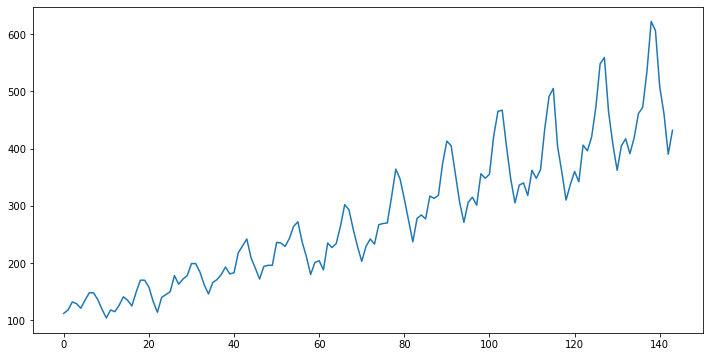

In [13]:
df_ar['Thousands of Passengers'].plot(figsize = (12,6))

In [14]:
## set month column as index

df_ar.set_index('Month', inplace = True)

In [15]:
df_ar

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<AxesSubplot:xlabel='Month'>

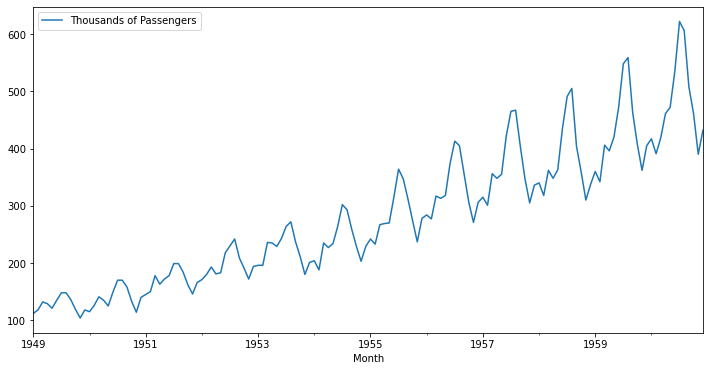

In [17]:
df_ar.plot(figsize = (12,6))   ## shows that data is seasonal with upward trend

##dataset is not stationary

In [18]:
## performing dickey fuller test

from statsmodels.tsa.stattools import adfuller

p_val = adfuller(df_ar['Thousands of Passengers'])

In [19]:
print(p_val)

#p_val==0.99 > 0.05 so null hypothesis is accepted and the data is not stationary

(0.8153688792060433, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [20]:
## making data stationary
## applying differencing technique - 1 shift

df_ar['First difference'] = df_ar['Thousands of Passengers'] - df_ar['Thousands of Passengers'].shift(1)

In [21]:
df_ar.head()

,Thousands of Passengers,First difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [22]:
## performing dikey-fuller test on 1st difference

p_val = adfuller(df_ar['First difference'].dropna())
print(p_val)

## p_val>=0.05 and null hypothesis is accepted - Data is non stationary

(-2.829266824169995, 0.05421329028382612, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854085)


In [23]:
## performing 2nd difference

df_ar['Second difference'] = df_ar['First difference'] - df_ar['First difference'].shift(1)

In [24]:
df_ar

,Thousands of Passengers,First difference,Second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [25]:
#again performing dickey fuller test

p_val = adfuller(df_ar['Second difference'].dropna())
print(p_val)

## null hypothesis is rejected.
## d value is -2

(-16.3842315424685, 2.7328918500142407e-29, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.6020417275604)


In [26]:
## seasonal difference can also be applied by a shift of 12 months -  for an entire year 
## sometimes arima may not work well sarimax will work well 

## df_ar['12 difference'] = df_ar['Thousands of passengers'] - df_ar['Thousands of passengers'] .shift(12)

In [27]:
df_ar['12 difference'] = df_ar['Thousands of Passengers'] - df_ar['Thousands of Passengers'] .shift(12)

In [28]:
df_ar

,Thousands of Passengers,First difference,Second difference,12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [29]:
p_val = adfuller(df_ar['12 difference'].dropna())
print(p_val) ##<<0.05
## null hypothesis is rejected

(-3.3830207264924814, 0.011551493085514952, 1, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 919.527129208137)


In [30]:
## to determine the p and q value using pacf and acf plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

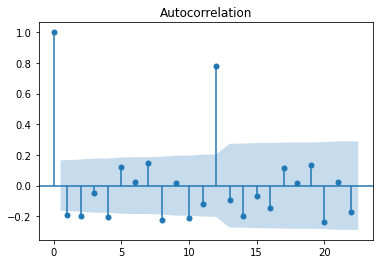

In [31]:
acf = plot_acf(df_ar['Second difference'].dropna())

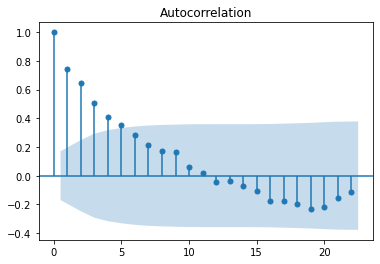

In [34]:
ac12 = plot_acf(df_ar['12 difference'].dropna())

## q= 5

C:\Users\sjasm\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


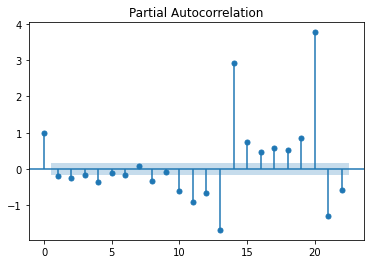

In [33]:
pacf = plot_pacf(df_ar['Second difference'].dropna())

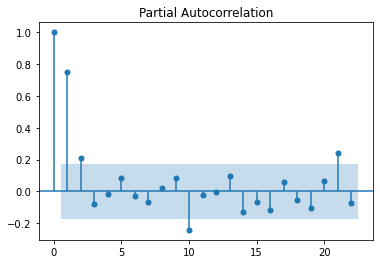

In [35]:
pacf_12 = plot_pacf(df_ar['12 difference'].dropna())

## try p = 2 and p= 10 

In [36]:
df_ar

,Thousands of Passengers,First difference,Second difference,12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [37]:
## split data

from datetime import datetime, timedelta

train_dataset_end_date = datetime(1955,12,1)
test_dataset_end_date = datetime(1960,12,1)

In [40]:
train_data = df_ar[:train_dataset_end_date]
test_data = df_ar[train_dataset_end_date + timedelta(days = 1) : test_dataset_end_date]

In [41]:
train_data.shape, test_data.shape

((84, 4), (60, 4))

In [42]:
df_ar.shape

(144, 4)

In [43]:
## create ARIMA model

from statsmodels.tsa.arima_model import ARIMA

In [44]:
train_data

,Thousands of Passengers,First difference,Second difference,12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [85]:
model_arima = ARIMA(train_data['Thousands of Passengers'], order = (6,2,0))

C:\Users\sjasm\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sjasm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [86]:
model_ar = model_arima.fit()

In [87]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(6, 2, 0)   Log Likelihood                -370.249
Method:                               css-mle   S.D. of innovations             21.935
Date:                        Sat, 26 Nov 2022   AIC                            756.499
Time:                                23:05:43   BIC                            775.752
Sample:                            03-01-1949   HQIC                           764.229
                                 - 12-01-1955                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0964      0.708     -0.136      0.892      -1.484       1.292
ar.L1.D2.Thousands of Passengers    -0.5234      0.112     -4.670      0.000      -0.743      -0.304
ar.L2.D2.Thousands of Passengers    -0.5974      0.123     -4.839      0.000      -0.839      -0.355
ar.L3.D2.Thousands of Passengers    -0.4456      0.129     -3.446      0.001      -0.699      -0.192
ar.L4.D2.Thousands of Passengers    -0.5501      0.131     -4.210      0.000      -0.806      -0.294
ar.L5.D2.Thousands of Passengers    -0.2916      0.132     -2.215      0.027      -0.550      -0.034
ar.L6.D2.Thousands of Passengers    -0.1073      0.118     -0.910      0.363      -0.338       0.124
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6458           -0.9596j            1.1567           -0.1557
AR.2            0.6458           +0.9596j            1.1567            0.1557
AR.3           -0.7082           -1.3927j            1.5624           -0.3249
AR.4           -0.7082           +1.3927j            1.5624            0.3249
AR.5           -1.2963           -1.0830j            1.6892           -0.3892
AR.6           -1.2963           +1.0830j            1.6892            0.3892
-----------------------------------------------------------------------------
"""

In [88]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [81]:
pred = model_ar.predict(start = pred_start_date, end = pred_end_date)

In [82]:
residuals = test_data['Thousands of Passengers'] - pred

In [83]:
pred

1956-01-01   -11.707539
1956-02-01   -27.273291
1956-03-01   -11.572103
1956-04-01   -15.651213
1956-05-01    10.508909
1956-06-01    18.715745
1956-07-01     6.136946
1956-08-01    -4.503851
1956-09-01    -9.963628
1956-10-01    -6.848906
1956-11-01     1.244127
1956-12-01     6.221565
1957-01-01     4.849644
1957-02-01     0.008035
1957-03-01    -3.630903
1957-04-01    -3.654830
1957-05-01    -0.875912
1957-06-01     1.834940
1957-07-01     2.327467
1957-08-01     0.805619
1957-09-01    -1.031414
1957-10-01    -1.679289
1957-11-01    -0.924170
1957-12-01     0.288979
1958-01-01     0.893124
1958-02-01     0.571051
1958-03-01    -0.191279
1958-04-01    -0.687142
1958-05-01    -0.595792
1958-06-01    -0.136819
1958-07-01     0.237815
1958-08-01     0.256468
1958-09-01    -0.005497
1958-10-01    -0.272396
1958-11-01    -0.334246
1958-12-01    -0.194440
1959-01-01    -0.013253
1959-02-01     0.057169
1959-03-01    -0.010272
1959-04-01    -0.128022
1959-05-01    -0.191289
1959-06-01    -0

In [84]:
residuals

Month
1956-01-01    295.707539
1956-02-01    304.273291
1956-03-01    328.572103
1956-04-01    328.651213
1956-05-01    307.491091
1956-06-01    355.284255
1956-07-01    406.863054
1956-08-01    409.503851
1956-09-01    364.963628
1956-10-01    312.848906
1956-11-01    269.755873
1956-12-01    299.778435
1957-01-01    310.150356
1957-02-01    300.991965
1957-03-01    359.630903
1957-04-01    351.654830
1957-05-01    355.875912
1957-06-01    420.165060
1957-07-01    462.672533
1957-08-01    466.194381
1957-09-01    405.031414
1957-10-01    348.679289
1957-11-01    305.924170
1957-12-01    335.711021
1958-01-01    339.106876
1958-02-01    317.428949
1958-03-01    362.191279
1958-04-01    348.687142
1958-05-01    363.595792
1958-06-01    435.136819
1958-07-01    490.762185
1958-08-01    504.743532
1958-09-01    404.005497
1958-10-01    359.272396
1958-11-01    310.334246
1958-12-01    337.194440
1959-01-01    360.013253
1959-02-01    341.942831
1959-03-01    406.010272
1959-04-01    396.1

<AxesSubplot:ylabel='Density'>

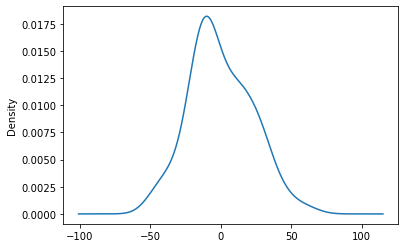

In [74]:
model_ar.resid.plot(kind = 'kde')

In [75]:
test_data['Predicted'] = pred

C:\Users\sjasm\AppData\Local\Temp\ipykernel_5904\3567221013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = pred


<AxesSubplot:xlabel='Month'>

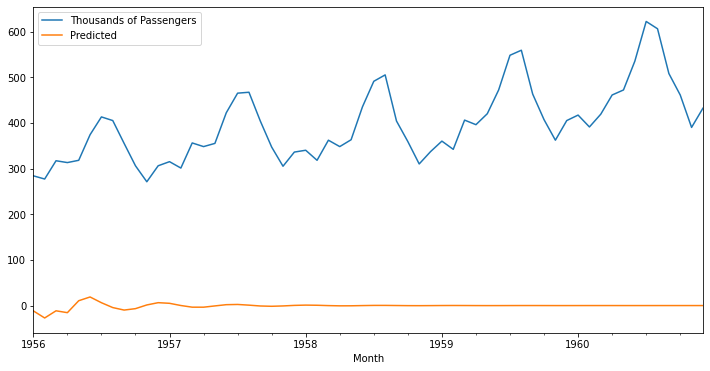

In [76]:
test_data[['Thousands of Passengers', 'Predicted']].plot(figsize = (12,6))